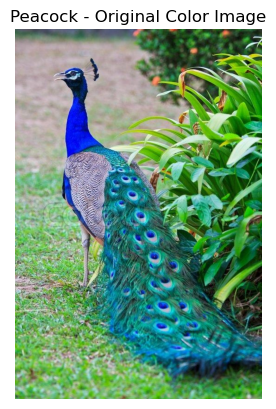

In [6]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# Load the original color image
img_color = cv2.imread("peacock.jpg")
if img_color is None:
    raise FileNotFoundError("Color image not found. Please check the path.")

# Convert BGR (OpenCV default) to RGB for correct display in Matplotlib
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Display the color image
plt.imshow(img_rgb)
plt.title("Peacock - Original Color Image")
plt.axis("off")  # Hide axes
plt.show()


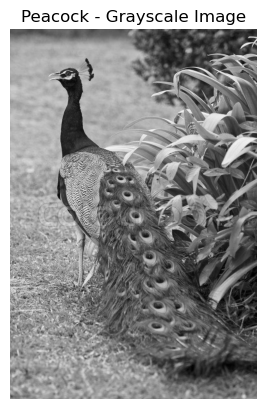

In [7]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# Load the original image in color
img_color = cv2.imread("peacock.jpg")
if img_color is None:
    raise FileNotFoundError("Image not found. Please check the path.")

# Convert to grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(img_gray, cmap='gray')
plt.title("Peacock - Grayscale Image")
plt.axis("off")  # Hide axes
plt.show()


In [8]:
# Convert original image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Increase brightness for grayscale
brightness_increase_gray = cv2.convertScaleAbs(img_gray, alpha=1, beta=50)


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x6f7fe6c3::Set<1,-1,-1>,struct cv::impl::A0x6f7fe6c3::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [34]:
# Convert original image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Decrease brightness for grayscale
brightness_decrease_gray = cv2.convertScaleAbs(img_gray, alpha=1, beta=-50)


In [37]:
# Convert original image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresholded_gray = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)


In [38]:
# Convert original image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Negative of grayscale image
negative_gray = 255 - img_gray


In [40]:
# Convert original image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float for log transformation
img_gray_float = img_gray.astype(np.float32)

# Apply log transformation
log_gray = np.uint8(255 * (np.log1p(img_gray_float) / np.log1p(np.max(img_gray_float))))


In [41]:
# Convert original image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float
img_gray_float = img_gray.astype(np.float32)

# Apply power-law (gamma) transformation
gamma = 0.5  # <1 for lighter, >1 for darker
power_gray = np.uint8(255 * ((img_gray_float / 255) ** gamma))


In [5]:
# Titles and images to display
titles = [
    'Original Color', 
    'Grayscale', 
    'Brightness +', 
    'Brightness -', 
    'Thresholding', 
    'Negative', 
    'Log Transform', 
    'Power Law (γ=0.5)'
]

images = [
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB),  # Original color
    img_gray,
    brightness_increase_gray,
    brightness_decrease_gray,
    thresholded_gray,
    negative_gray,
    log_gray,
    power_gray
]

NameError: name 'img_gray' is not defined

In [3]:
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'images' is not defined

<Figure size 1200x800 with 0 Axes>